/var/folders/9b/j80hsvl1701f43nhrmrd__mr0000gn/T/ipykernel_43789/787005728.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(list(np.binary_repr(num).zfill(m))).astype(np.bool)


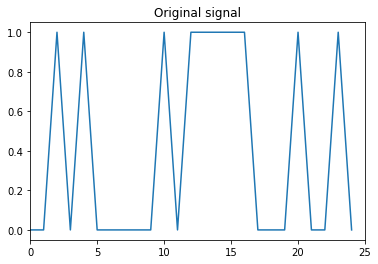

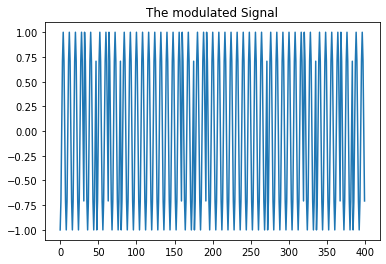

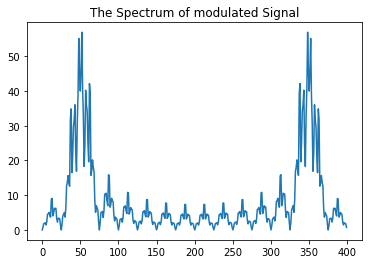

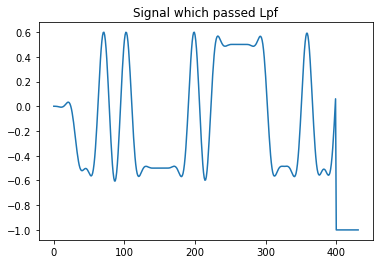

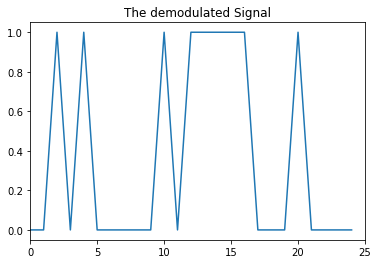

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 23 18:32:03 2023

@author: ranshuai
"""

# BPSK
import numpy as np
from matplotlib import pyplot as plt
from scipy import fft
from scipy import signal
def bin_array(num, m):
    """Convert a positive integer num into an m-bit bit vector"""
    return np.array(list(np.binary_repr(num).zfill(m))).astype(np.bool)
# import 24 bit digital data
id_num = 2633609
Nbits = 24
tx_bin = bin_array(id_num, Nbits) # 转换后的24位二进制学号
tx_bin = np.append(tx_bin,0)
Nbits = 25
bit_len = 16 #
fc = 0.125 # normalized frequency
s = np.copy(tx_bin) # s就是原始信号
tx_mod = np.empty(0) # 被调制之后的信号
plt.figure()
plt.plot(tx_bin)
plt.title("Original signal")
plt.xlim(0,25)
plt.show()

############### modulation###############
for i in range(0,Nbits):
    for j in range(bit_len):
        tx_mod = np.append(tx_mod,(2*s[i]-1)*np.cos(2*np.pi*fc*(i*bit_len+j)))# 把信号追加到tx_mod中

plt.figure()
plt.plot(tx_mod)
plt.title("The modulated Signal")
plt.show()

plt.figure()
plt.plot(np.abs(fft.fft(tx_mod))) #因为是傅立叶变换是 complex quantity 复数 方便在spectrum analyser上查看
plt.title("The Spectrum of modulated Signal")
plt.show()


##########demodulation###############
numtaps = 64
delays = np.arange(numtaps) # 为了画载波的波形
b1 = signal.firwin(numtaps, 0.1) # 滤波器的系数
rx_demod = np.empty(0)
for i in range(Nbits):
    for j in range(bit_len):
        rx_demod = np.append(rx_demod,tx_mod[i*bit_len+j]*np.cos(2*np.pi*fc*(i*bit_len+j)))# 
# 这是解调制过程,目的是为了s(t)*cos"*cos得到原始信号 可参见课件
rx_filt = signal.lfilter(b1,1,rx_demod)
rx_filt = np.append(rx_filt,-np.ones(numtaps//2))

plt.figure()
plt.plot(rx_filt)
plt.title("Signal which passed Lpf")
plt.show()

demodulated_signal = np.empty(0) # modulated signal
for i in range(Nbits):
    t = (2*i+1)*bit_len//2 + numtaps//2
    demodulated_signal = np.append(demodulated_signal,rx_filt[t] > 0.0) # threshold

plt.figure()
plt.plot(demodulated_signal)
plt.title("The demodulated Signal")
plt.xlim(0,25)
plt.show()





